In [837]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [838]:
class linear_regression: 
    def read_csv(self, file_name):
        """
        This function reads the content of the a CSV file and returns the result in a list of array
            Arguments:
                file_name: string
            Returns:
                list: Content of the CSV in list of array format e.g. [[data1, data2], [data3, data4]]
        """
        result = []
        with open(file_name) as f:
            content = f.readlines()
            # loop through the csv from start to finish
            for x in content[:]:
                # split each rows by comma 
                res = x.split(",")
                # convert each column to array and add to result array
                result.append([float(res[0]), float(res[1])])

        return result
    
    
    def calculate_mean(self, list):
        """
        This function calculates the mean/average of a list
            Arguments:
                list: array
            Returns:
                float: the total sum of the items in the list/count of items. 
        """
        sum = 0
        for item in list:
            sum += item

        return sum/len(list)
    
    def get_axis(self, list, column_index):
        """
        This function gets a specific column from a list
            Arguments:
                list: array
                column_index: int 
            Returns:
                array: the list of items in the specific column of a list
        """
        response = []
        for item in list:
            response.append(item[column_index])

        return response;  
    
    def compute_covariant(self, axis_data, axis_mean):
        """
        This function computes the co-variant of each of the axis
            Arguments:
                axis_data: list
                axis_mean: float
            Returns:
                float: The difference of the axis data and its mean
        """
        return axis_data - axis_mean

    
    def compute_beta_hat(self, x_axis, mean_x, y_axis, mean_y):
        """
        This function computes the beta_hat of the linear regression
            Arguments:
                list: list
                mean_x: float
                mean_y: float
            Returns:
                float
        """
        sum_numerator = 0;
        sum_denomenator = 0;
        N = len(x_axis)

        for i in range(N):
            sum_numerator += (x_axis[i] - mean_x) * (y_axis[i] - mean_y)
            sum_denomenator += (x_axis[i] - mean_x) ** 2

        coef = sum_numerator / sum_denomenator
        return coef

    def compute_mean_squared_error(self, y_axis_list, y_prediction):
        """
        This function computes the mean squared error of the linear regression
            Arguments:
                y_axis_list: list
                mean_x: float
                mean_y: float
            Returns:
                float
        """
        square_of_diff = np.square(y_axis_list - y_prediction)
        mean_squared_error = np.mean(square_of_diff)
        return mean_squared_error
    
    def compute_r2_score(self, mse, axis): 
        """
        This function computes the r squared of the linear regression
            Arguments:
                mse: float
                axis: list
            Returns:
                float
        """
        variance = np.var(axis) #gets the variance of the axis
        return 1 - (mse / variance)
    
    def predict(self, alpha_hat, beta_hat, x_axis):
        """
        This function predicts the output of the linear regression
            Arguments:
                alpha_hat: float
                beta_hat: float
                x_axis: list
            Returns:
                float
        """
        return alpha_hat * x_axis + beta_hat
    
linearRegr = linear_regression()

#### Read CSV

In [839]:
csv_content = linearRegr.read_csv("diabetes1.csv")

#### Get each axis of the list

In [840]:
general_x_axis = np.array(linearRegr.get_axis(csv_content, 0))
general_y_axis = np.array(linearRegr.get_axis(csv_content, 1))

x_axis = general_x_axis[:80]
y_axis = general_y_axis[:80]

In [841]:
#calculate the mean of each axis
mean_x, mean_y = (linearRegr.calculate_mean(x_axis), linearRegr.calculate_mean(y_axis))

#### Compute beta_hat

In [842]:
beta_hat = linearRegr.compute_beta_hat(x_axis, mean_x, y_axis, mean_y)

#### Compute alpha_hat

In [843]:
alpha_hat = mean_y - (beta_hat * mean_x)

#### Generate the linear function (y = mx + c)

In [844]:
prediction = (beta_hat * x_axis) + alpha_hat

#### Plot the graph

In [845]:
test_length = 20
train_length = 80
x_train_data = x_axis[:train_length]
x_test_data = x_axis[-test_length:]

y_train_data = y_axis[:train_length]
y_test_data = y_axis[-test_length:]

In [846]:
mse = linearRegr.compute_mean_squared_error(y_axis, prediction)

my_r2_score = linearRegr.compute_r2_score(mse, y_axis) 
intercept = mean_y - (beta_hat * mean_x)

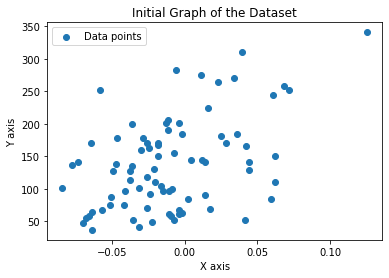

In [847]:
#plot the scatter graph of the dataset
plt.scatter(x=x_axis, y=y_axis, label="Data points")
plt.legend()
plt.title("Initial Graph of the Dataset")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

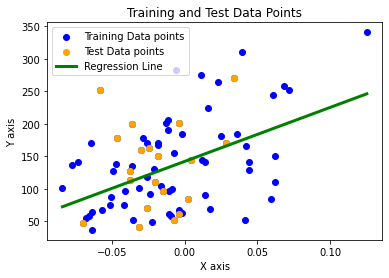

In [848]:
# plot a scatter graph
plt.title("Training and Test Data Points")
plt.scatter(x=x_train_data, y=y_train_data, color="blue", label="Training Data points" )
plt.scatter(x=x_test_data, y=y_test_data, color="orange", label="Test Data points")
# plot the regression line on the graph 
plt.plot([min(x_axis),max(x_axis)],[min(regr_line),max(regr_line)],color='green', linewidth=3, label="Regression Line")
plt.xlabel("X axis")
plt.ylabel("Y axis")
# display the graph
plt.legend()
plt.show()

In [849]:
print("Intercept:%.2f" % intercept)
print("Coefficients: %.2f" % beta_hat)
print("Mean squared error: %.2f" % mse)
print("R squared error: %.2f" % my_r2_score)

Intercept:146.67
Coefficients: 804.12
Mean squared error: 3860.04
R squared error: 0.21


###  VALIDATING RESULTS WITH SKLEARN

In [850]:
x_axis_sk_data = general_x_axis.reshape(100, 1)
y_axis_sk_data = general_y_axis.reshape(100, 1)

In [851]:
# Splitting data into training and test data
test_length = 20
train_length = 80
x_train_data = x_axis_sk_data[:train_length]
x_test_data = x_axis_sk_data[-test_length:]

y_train_data = y_axis_sk_data[:train_length]
y_test_data = y_axis_sk_data[-test_length:]

In [852]:
#creating a linear regression object
sk_linear_regr = linear_model.LinearRegression()

In [853]:
sk_linear_regr.fit(x_train_data, y_train_data)

LinearRegression()

In [854]:
y_axis_prediction = sk_linear_regr.predict(x_test_data)

In [855]:
# The coefficients
print("Intercept: %.2f" % sk_linear_regr.intercept_)
print("Coefficients: %.2f" % sk_linear_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_data, y_axis_prediction))
print("R squared score: %.2f" % r2_score(y_test_data, y_axis_prediction))

Intercept: 146.67
Coefficients: 804.12
Mean squared error: 2516.94
R squared score: 0.28


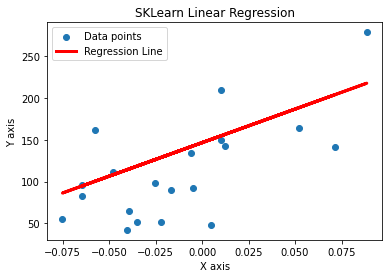

In [856]:
# Plot outputs
plt.title("SKLearn Linear Regression")
plt.scatter(x=x_test_data, y=y_test_data, label="Data points")
# plot the regression line
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x_test_data, y_axis_prediction, color="red", linewidth=3, label="Regression Line")
plt.legend()
plt.show()

### Plot a scatter graph to visualize the outputs of Manual and SKLearn Computation

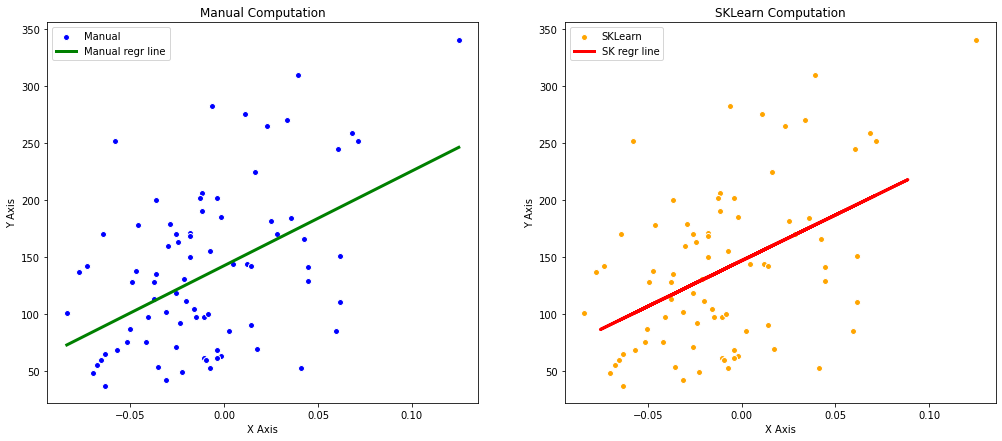

In [857]:
fig, plots = plt.subplots(1, 2, figsize=(17,7))
plots[0].scatter(x=x_axis, y=y_axis, color="blue", label="Manual", edgecolors = "white")
plots[0].plot([min(x_axis),max(x_axis)],[min(regr_line),max(regr_line)],color='green', linewidth=3, label="Manual regr line")
plots[0].set_xlabel("X Axis")
plots[0].set_ylabel("Y Axis")
plots[0].set_title("Manual Computation")
plots[0].legend()

plots[1].scatter(x=x_axis, y=y_axis, color="orange", label="SKLearn", edgecolors = "white")
plots[1].plot(x_test_data, y_axis_prediction, color="red", linewidth=3, label="SK regr line")
plots[1].set_xlabel("X Axis")
plots[1].set_ylabel("Y Axis")
plots[1].set_title("SKLearn Computation")
plots[1].legend()

plt.show()